In [1]:
__author__ = 'Robert Nikutta <nikutta@noao.edu, Data Lab Team <datalab@noao.edu'
__version__ = '20200616' # yyyymmdd
__datasets__ = ''
__keywords__ = ['Jupyter','Python','SQL','tutorial']


<a class="anchor" id="goals"></a>
# Goals
Learn or review the basics of:
- How to use a Jupyter notebook
- Simple Python operations, package imports, and simple plots
- Importing Data Lab packages
- Logging in to Data Lab
- Query the Data Lab database through SQL

<a class="anchor" id="summary"></a>
# Summary
In this notebook, we provide a review of simple Jupyter notebook operations, basic Python, and show how to access catalog data through the Data Lab.  We construct a basic Structured Query Language (SQL) query, and issue it through the Data Lab both in while-you-wait (synchronous) and batch (asynchronous) mode.

# Table of contents


## Jupyter 101
* [Get by with just a few shortcuts](#shortcuts)
* [Create a new notebook](#newnotebook)
* [Save a notebook](#savenotebook)
* [Start an existing notebook](#startexisting)
* [The kernel: change, stop, restart, swear, repeat](#kernel)

## Python 101 - 201
* [Hello world](#hello) _print()_
* [Hello you](#helloyou) _functions_
* [2 + 2](#calc) _math_
* [If it quacks like a duck...](#duck) _types_
* [Extra power through modules](#modules) _packages_
* [Everything is an object](#object) _attributes & methods_
* [Example: Plot a 1-d function](#plot1d) _plotting_
* [Example: Plot a 2d Gaussian](#gauss2d) _array calcs_
* [Example: Make a scatter plot](#scatter) _export data to file_

## Data Lab 101
* [Import Data Lab packages](#dlimport)
* [Login](#login)

## SQL 101
* [Structure of a simple query](#querystructure)
* [Our first Data Lab query](#firstquery)
* [LIMIT yourself](#limit)
* [What's there anyway?](#whatsthere)
* [Async queries](#async)

## Links you need

| What | Where |
|------|-------|
|Get your Data Lab account now!| https://datalab.noao.edu/ |
|To the Data Lab notebook server!| https://datalab.noao.edu/devbooks |
|Always look to the Data Lab user manual (and use search function)| https://datalab.noao.edu/docs/manual/ |
|Ask questions on our help desk| https://datalab.noao.edu/help/ |


# Jupyter notebook
<a class="anchor" id="shortcuts"></a>

## Get by with just a few shortcuts

Everything is entered into _cells_. A cell can hold text, or code, or an image, etc.

A _code_ cell can be executed (i.e. the Python code can be _run_), just select the cell (move arrows up/down), then press `SHIFT + ENTER`

`ESC + m` change cell type to mardown (for writing text)

`ESC + y` change cell type to code (for entering Python code)

`ESC + a` add a new cell above the current one

`ESC + b` add a new cell below the current one

`ESC + x` cut/delete a cell

`ESC + v` paste a cell

`ESC + h` pop up a help window (more shortcuts)

<a class="anchor" id="newnotebook"></a>
## Create a new notebook

<a class="anchor" id="savenotebook"></a>
## Save a notebook

<a class="anchor" id="startnotebook"></a>
## Start an existing notebook

<a class="anchor" id="kernel"></a>
## The kernel: change, stop, restart, swear, repeat

# Python 101 - 201
<a class="anchor" id="hello"></a>
## Hello World!
Python is an interpreted programming language
You write a line of Python code, or many lines, and run them. No compilation step.

In [2]:
print("Hello World!")

Hello World!


Note that strings are within single or double quotes.

<a class="anchor" id="helloyou"></a>
## Hello you!
Let's write our first function. The template for functions is always the same:

```
def function_name(arguments):
    do something
    [return something] # optional
```

In [3]:
def helloyou(name):
    # will print your name
    print("Hello",name,'!')

Separate all arguments to the print function by commas. They will all be printed in order.

Comment lines in Python begin with `#`

In [4]:
helloyou('Kitty')

Hello Kitty !


<a class="anchor" id="calc"></a>
## 2 + 2
Use Python as a powerful calculator

In [5]:
2+2

4

In [6]:
3**1.2345

3.881558974007327

<a class="anchor" id="duck"></a>
## Python has _duck typing_ 🦆
If it walks like a duck and quacks like a duck, it must be a duck!

In [7]:
type(2)

int

In [8]:
type(3.1415)

float

In [9]:
type('word')

str

In [10]:
type(helloyou)

function

In [11]:
a = 2
b = 3.1415
c = a*b
type(c)

float

In [12]:
2*"yo"

'yoyo'

<a class="anchor" id="modules"></a>
## Extra power with modules/packages
Python has a lot of functionality built-in in its standard library.
But much more functionality can be added by importing specific packages.

In [13]:
import numpy as np # "numeric python" - math and array operations

Or import under a different (often shorter) name:

In [14]:
np.sqrt(17)

4.123105625617661

In [15]:
np.rad2deg(2*np.pi) # convert radians to degrees

360.0

In [16]:
np.rad2deg(1)

57.29577951308232

In [17]:
a = np.array((1,2,3))
b = np.array((3,2,1))
print("Vector                 a =", a)
print("Vector                 b =", b)
print()
print("Sum                  a+b =", a+b)
print("Element-wise product a*b =", a*b)
print("Dot product          a.b =", np.dot(a,b))

Vector                 a = [1 2 3]
Vector                 b = [3 2 1]

Sum                  a+b = [4 4 4]
Element-wise product a*b = [3 4 3]
Dot product          a.b = 10


In [18]:
a+b

array([4, 4, 4])

In [19]:
a*b

array([3, 4, 3])

In [20]:
np.dot(a,b)

10

<a class="anchor" id="object"></a>
## Everything in Python is an object...
... and object have things ...

In [21]:
A = np.eye(3) # rank-3 identity matrix (just a 2-d Numpy array)
A

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [22]:
A.shape # shape of the array

(3, 3)

In [23]:
A.size  # how many elements in A

9

## ... and objects can do things

In [24]:
A.diagonal()

array([1., 1., 1.])

In [25]:
A.mean()

0.3333333333333333

<a class="anchor" id="plot1d"></a>
# Example: Plot a 1-d function

All we need to start plotting... is a plotting module!

In [26]:
import pylab as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (5,5)

In [27]:
x = np.linspace(0,2*np.pi,100) # min,max,nsteps
print(x)

[0.         0.06346652 0.12693304 0.19039955 0.25386607 0.31733259
 0.38079911 0.44426563 0.50773215 0.57119866 0.63466518 0.6981317
 0.76159822 0.82506474 0.88853126 0.95199777 1.01546429 1.07893081
 1.14239733 1.20586385 1.26933037 1.33279688 1.3962634  1.45972992
 1.52319644 1.58666296 1.65012947 1.71359599 1.77706251 1.84052903
 1.90399555 1.96746207 2.03092858 2.0943951  2.15786162 2.22132814
 2.28479466 2.34826118 2.41172769 2.47519421 2.53866073 2.60212725
 2.66559377 2.72906028 2.7925268  2.85599332 2.91945984 2.98292636
 3.04639288 3.10985939 3.17332591 3.23679243 3.30025895 3.36372547
 3.42719199 3.4906585  3.55412502 3.61759154 3.68105806 3.74452458
 3.8079911  3.87145761 3.93492413 3.99839065 4.06185717 4.12532369
 4.1887902  4.25225672 4.31572324 4.37918976 4.44265628 4.5061228
 4.56958931 4.63305583 4.69652235 4.75998887 4.82345539 4.88692191
 4.95038842 5.01385494 5.07732146 5.14078798 5.2042545  5.26772102
 5.33118753 5.39465405 5.45812057 5.52158709 5.58505361 5.648520

In [28]:
y = np.sin(x)

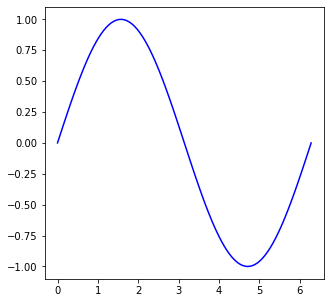

In [29]:
plt.plot(x,y,'b-')

<a class="anchor" id="gauss2d"></a>
# Example: Plot a 2-d Gaussian

In [30]:
from astropy.modeling.models import Gaussian2D

In [31]:
g = Gaussian2D(x_mean=0,y_mean=0,x_stddev=5,y_stddev=10)

In [32]:
nx = 100
half = nx//2
x = np.linspace(-half,half,nx)
X,Y = np.meshgrid(x,x) # using x for both x and y axes, since we want a square array anyway

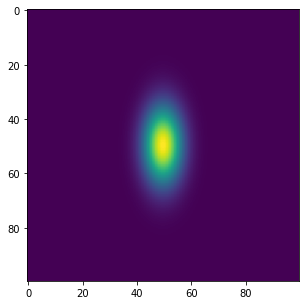

In [33]:
plt.imshow(g(X,Y))

<a class="anchor" id="scatter"></a>
# Example: Make a scatter plot

In [34]:
x = np.random.normal(size=1000)
y = np.random.normal(size=1000)

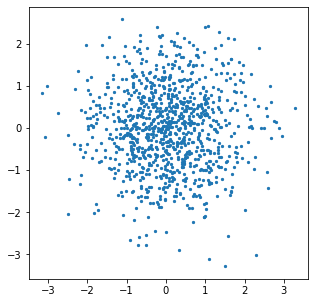

In [35]:
plt.scatter(x,y,s=5)

# Data Lab 101
Full introduction to Data Lab in the tutorial session.

For now just the bare minimum to get us started.

<a class="anchor" id="dlimport"></a>
## Import Data Lab packages (almost always this way)

In [36]:
from dl import authClient as ac, queryClient as qc
from dl.helpers.utils import convert
from getpass import getpass

<a class="anchor" id="login"></a>
## Log in
Uncomment this line to log in as a registered user (only needs to be done once), default is to be logged in as anonymous.

In [37]:
#token = ac.login('username',getpass("Enter password (+ENTER): ")) # replace 'username' with your actual user name

In [38]:
ac.whoAmI() # should return your username if logged in

'robertdemo'

# SQL - Structured Query Language

<a class="anchor" id="sqldescribe"></a>
## SQL is a way to describe to a database what you want from it
General template for a simple query written in SQL
```
SELECT something
FROM database.table
WHERE constraints
```

The `something` is usually a list of column names, e.g. `SELECT ra,dec`

A `database` has a name, and usually holds several `table`s.

E.g. to access columns in the `gaia_dr2` database, `gaia_source` table, one could ask for
`gaia_dr2.gaia_source`

The `constaints` are filters, or qualifiers, on the query, e.g.:

`WHERE ra>90`

Or combine several constaints:

```
WHERE ra>90 AND ra<100
AND dec>40 AND dec<42
```

<a class="anchor" id="limit"></a>
## LIMIT yourself
If you append a `LIMIT 100` (or any small number) to your query, the database will return only the first 100 result rows. This is usually fast and you can tweak your query many times this way until you get it right.

**Excellent advice while testing queries: LIMIT yourself.**

The template becomes:
```
SELECT something
FROM database.table
WHERE constraints
LIMIT 100
```

<a class="anchor" id="firstquery"></a>
## Our first Data Lab query
Let's ask for the radial velocities of all stars in Gaia DR2 around the position of the LMC"

In [39]:
# coordinates of the LMC
#ra = 81.
#dec = -69.8

query = """
SELECT radial_velocity
FROM gaia_dr2.gaia_source
WHERE ra>78 and ra<84
  AND dec>-73 and dec<-67
  AND radial_velocity != 'nan'
  AND abs(radial_velocity)>0.
"""

print(query)


SELECT radial_velocity
FROM gaia_dr2.gaia_source
WHERE ra>78 and ra<84
  AND dec>-73 and dec<-67
  AND radial_velocity != 'nan'
  AND abs(radial_velocity)>0.



Now let's submit the query to the Data Lab database

In [40]:
%%time
result = qc.query(sql=query)

CPU times: user 61 ms, sys: 5.2 ms, total: 66.2 ms
Wall time: 19.1 s


It took some time (under a minute I hope), and the returned result is in the variable called `result`.

What type is `result`?

In [41]:
type(result)

str

The type is 'str' or string.

How long is this 'str' object? (in characters)

In [42]:
len(result)

28892

That's many characters! Let's print the first 200 or so:

In [43]:
result[:200]

'radial_velocity\n207.727833166464\n23.2009589660335\n31.4744016821897\n67.1842681401041\n64.6912770877775\n5.7175772412558\n34.5608096828583\n24.1407840749465\n-17.8925929452325\n-6.61811738815661\n13.3448445607'

It's like a long string. The `\n` are line breaks. The first line is the header (here just `radial_velocity`).

It's hard to plot a long text object. We convert to a more "numerical" data format:

In [44]:
df = convert(result,'pandas') # df mean data frame

What does the converted table look like?

In [45]:
print(df.shape)
df.head(5)

(1694, 1)


,radial_velocity
0,207.727833
1,23.200959
2,31.474402
3,67.184268
4,64.691277


Ah yes, 1694 rows, and 1 column (`radial_velocity`).

Let's plot a histogram of the radial velocities:

(-100.0, 500.0)

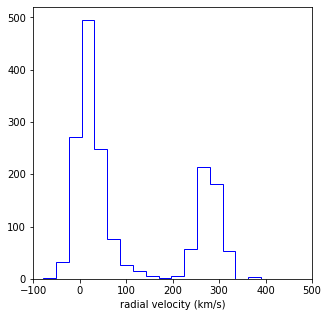

In [46]:
res = plt.hist(df['radial_velocity'],bins=50,histtype='step',color='b')
plt.xlabel('radial velocity (km/s)')
plt.xlim(-100,500)

The radial velocity of the LMC is ~270 km/s.

<a class="anchor" id="whatsthere"></a>
# What's there anyway?
How can you find what databases and tables there are in Data Lab?

## List all databases:

In [47]:
print(qc.schema())


     Schema Name   Description
     -----------   -----------
         allwise   The AllWISE data release
         dad_dr1   DECam Asteroid Database -- Data Release 1
         dad_dr2   DECam Asteroid Database -- Data Release 2
      decaps_dr1   DECam Plane Survey Data Release 1
         des_dr1   Dark Energy Survey (DES) Data Release 1
        des_sva1   DES SVA1 Data Products
        gaia_dr1   GAIA Data Release 1
        gaia_dr2   Gaia Data Release 2 -- April 25, 2018
       hipparcos   ftp://cdsarc.u-strasbg.fr/pub/cats/I/239/ReadMe
      hipparcos2   A new reduction of the astrometric data as produced by the
                   Hipparcos mission has been published, claiming accuracies
                   for nearly all stars brighter than magnitude Hp=8 to be b
                   etter, by up to a factor 4, than in the original catalogue
                   . ftp://cdsarc.u-strasbg.fr/pub/cats/I/311/ReadMe
            ivoa   IVOA SIA/ObsCore Tables for NOAO Science Archive images


## List all tables in a database:

In [48]:
print(qc.schema('gaia_dr2'))


Schema: gaia_dr2

      Table Name   Description
      ----------   -----------
         allwise   Allwise AGN Gaia DR2 cross-identification
         cepheid   Cepheid stars (Gaia collaboration)
         des_dr1   1.5-arcsec positional crossmatch against DES DR1
     gaia_source   Primary object table
            iers   IERS GaiaDR2 cross-identification
    light_curves   Light-curve data
             lpv   Long Period Variable stars (Gaia collaboration)
          ls_dr5   1.5-arcsec positional crossmatch against Legacy Survey DR5
          ls_dr6   1.5-arcsec positional crossmatch against Legacy Survey DR6
         nsc_dr1   1.5-arcsec positional crossmatch against NSC DR1
        numtrans   Calibrated FoV transit photometry from CU5, consolidated a
                   nd provided by CU7 for variable stars in Gaia DR2 (epoch_p
                   hotometry, part 1) ( Gaia collaboration)
              rm   Rotation period in segment, part 1 (vari_rotation_modulati
                   on)

## List all columns in a table in a database

In [49]:
print(qc.schema('gaia_dr2.gaia_source'))


Schema: gaia_dr2
 Table: gaia_source

     Column Name   Description
     -----------   -----------
     solution_id   Solution Identifier
        ra_error   Standard error of right ascension
       dec_error   Standard error of declination
      pmra_error   Standard error of proper motion in right ascension direction
     pmdec_error   Standard error of proper motion in declination direction
     ra_dec_corr   Correlation between right ascension and declination
ra_parallax_corr   Correlation between right ascension and parallax
    ra_pmra_corr   Correlation between right ascension and proper motion in r
                   ight ascension
   ra_pmdec_corr   Correlation between right ascension and proper motion in d
                   eclination
dec_parallax_cor   Correlation between declination and parallax
   dec_pmra_corr   Correlation between declination and proper motion in right
                   ascension
  dec_pmdec_corr   Correlation between declination and proper motion in 

<a class="anchor" id="async"></a>
# If you're too cool to be sitting around: async queries
A query that could run potentially longer than your attention span... In that case just submit it in async mode, and retrieve the results later when the query is done (and when you've had your well-deserved coffee):

In [50]:
query = """SELECT ra,dec FROM smash_dr1.object 
WHERE fieldid = 169 AND depthflag > 1 
AND ndetr > 3 AND ndetg > 3 
AND abs(sharp) < 0.5 
AND gmag BETWEEN 9 AND 25 
AND (gmag-rmag) BETWEEN -0.4 AND 0.4"""

Asynchronous queries get a jobid upon submission, e.g.:

```
jobid = qc.query(adql=query,async_=True)
print(jobid)
q5qy6ujsu9cnygcp
```

You can then check periodically for the status of the query, by submitting the `jobid` string to the `status` method:

```
qc.status(jobid)
'EXECUTING'
```

If you repeat the `status` request a bit later, it will eventually change to `'COMPLETED'`, at which point you can retrieve the result:

```
result = qc.results(jobid)
```

**Luckliy, there is a built-in mechanism to do the periodic checking for you.** It also retrieves the results of your query for you at the end. The signature is:

```
result = qc.query(sql=query,async_=True,wait=True,poll=5,verbose=1)
```

where `poll` sets the polling period (in seconds).

In [51]:
result = qc.query(adql=query,async_=True,wait=True,poll=1,verbose=1)

EXECUTING
Status = EXECUTING; elapsed time: 0, timeout in 300
EXECUTING
Status = EXECUTING; elapsed time: 1, timeout in 299
EXECUTING
Status = EXECUTING; elapsed time: 2, timeout in 298
EXECUTING
Status = COMPLETED; elapsed time: 3, timeout in 297
Retrieving results


Convert to Pandas dataframe, just like before:

In [52]:
df = convert(result)

Use the dataframe as you please, e.g. here to plot RA & Dec:

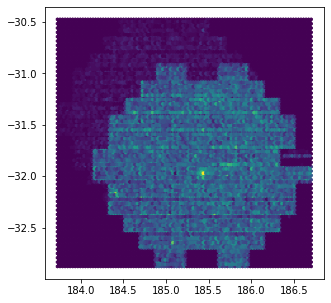

In [53]:
plt.hexbin(df['ra'],df['dec'])